In [10]:
# Importiere die benötigten Bibliotheken
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [11]:
# Definiere den Pfad zu den Testdaten
test_dataset_dir = './dataset/test_images'

# Erstelle einen ImageDataGenerator für die Testdaten ohne Augmentation
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Erstelle den Testdaten-Generator
test_generator = test_datagen.flow_from_directory(
    test_dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1711 images belonging to 50 classes.


In [12]:
def calculateModelMetrics(modelpath):
    # Lade das Modell und führe Vorhersagen durch
    model = load_model(modelpath)
    y_pred = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
    y_pred = np.argmax(y_pred, axis=1)
    y_true = test_generator.classes
    categories = list(test_generator.class_indices.keys())

    # Berechne die Anzahl der wahren und vorhergesagten Klassen sowie der korrekt vorhergesagten Klassen
    true_counts = np.zeros(len(categories), dtype=int)
    pred_counts = np.zeros(len(categories), dtype=int)
    correct_counts = np.zeros(len(categories), dtype=int)

    for i in range(len(categories)):
        true_counts[i] = np.sum(y_true == i)
        pred_counts[i] = np.sum(y_pred == i)
        correct_counts[i] = np.sum((y_true == i) & (y_pred == i))

    # Berechne die Gesamtsummen und die Genauigkeit
    total_true_count = np.sum(true_counts)
    total_correct_predictions = np.sum(correct_counts)
    accuracy = (total_correct_predictions / total_true_count) * 100

    # Gebe die zusätzlichen Kennzahlen aus
    print(f'Total True Count: {total_true_count}')
    print(f'Total Correct Predictions: {total_correct_predictions}')
    print(f'Accuracy: {accuracy:.4f}')

    # Erstelle eine Tabelle mit den Ergebnissen
    results = pd.DataFrame({
        'Category': categories,
        'True Count': true_counts,
        'Predicted Count': pred_counts,
        'Correct Predictions': correct_counts
    })

    return results

def visualizeMetrics(result_df):
    plt.figure(figsize=(30, 10))
    x = np.arange(len(result_df.index))
    width = 0.2

    plt.bar(x - width, result_df["True Count"], width, label='True Count')
    plt.bar(x, result_df["Predicted Count"], width, label='Predicted Count')
    plt.bar(x + width, result_df["Correct Predictions"], width, label='Correct Predictions')

    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.title('True vs Predicted vs Correct Predictions per Category')
    plt.xticks(x, result_df["Category"], rotation=90)
    plt.legend()
    plt.show()

c:\workarea\ml2\ml2_abschlussprojekt\artist_image_model\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 314ms/step
Total True Count: 1711
Total Correct Predictions: 608
Accuracy: 35.5348


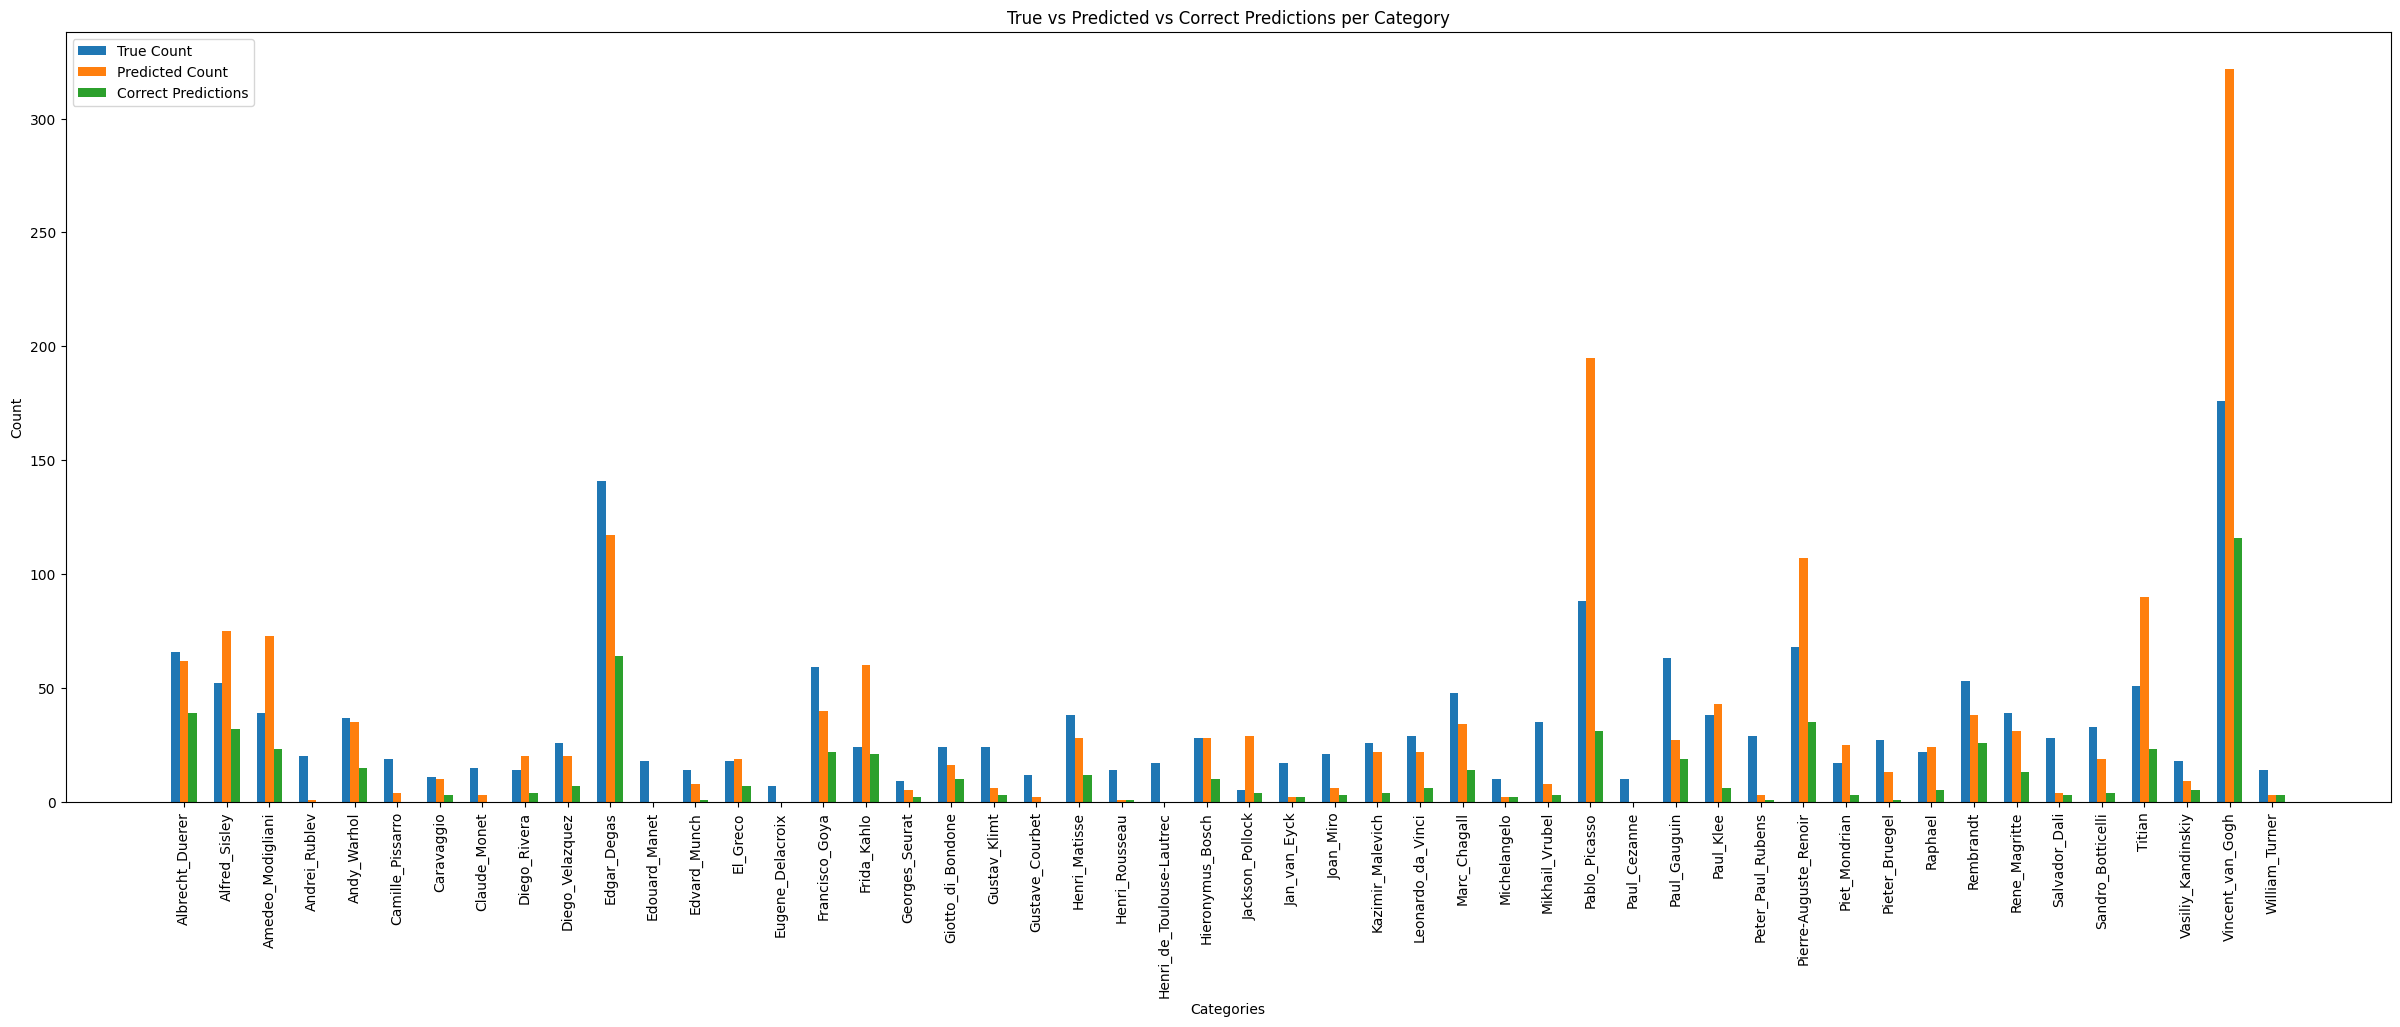

In [13]:
# Lade das Modell und führe Vorhersagen durch
results_v2 = calculateModelMetrics('./trained_models/my_model_v2.h5')
# Visualisierung der Ergebnisse
visualizeMetrics(results_v2)

54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 278ms/step
Total True Count: 1711
Total Correct Predictions: 610
Accuracy: 35.6517


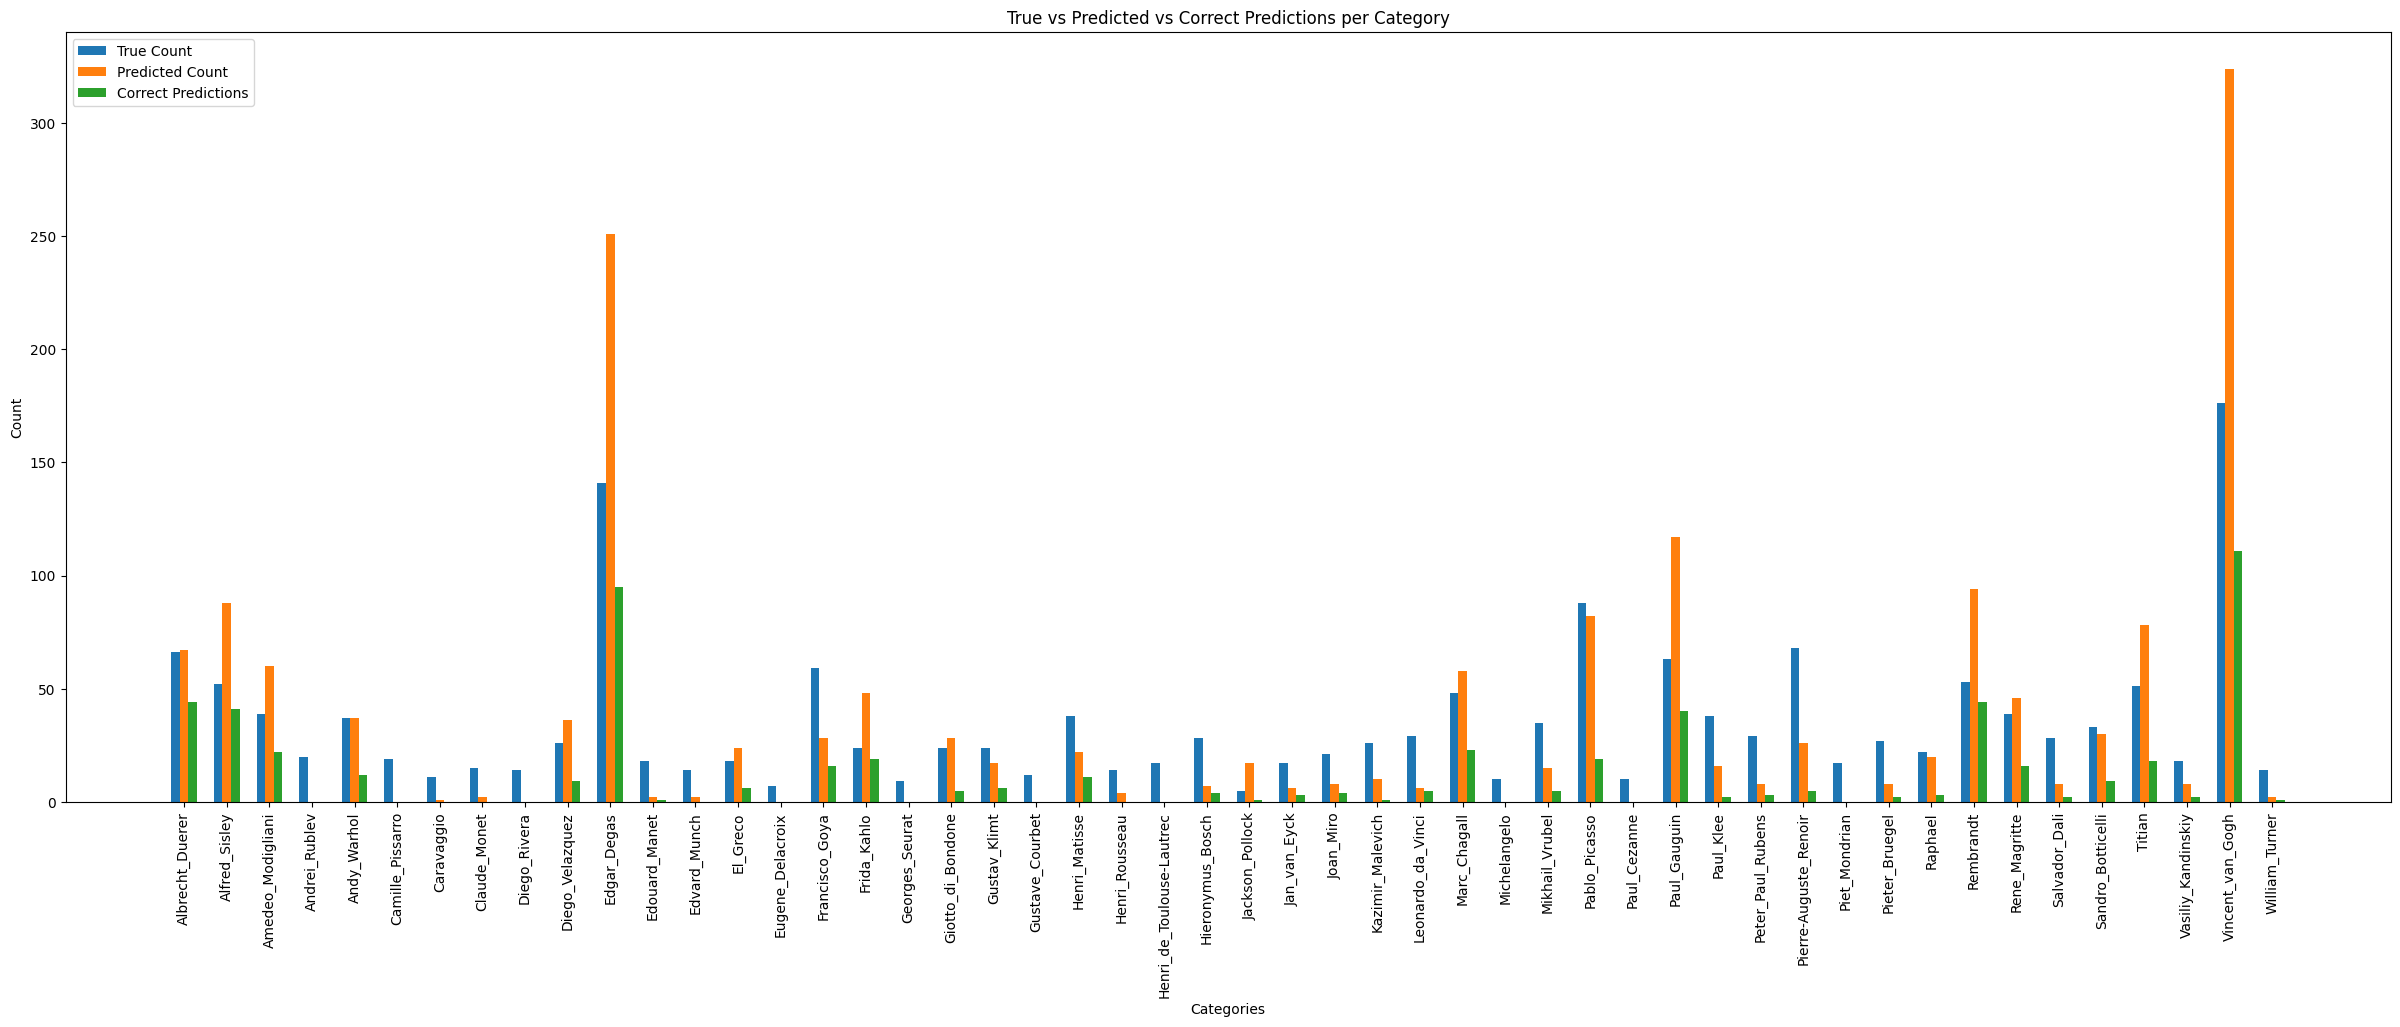

In [14]:
# Lade das Modell und führe Vorhersagen durch
results_v4 = calculateModelMetrics('./trained_models/my_model_v4.h5')
# Visualisierung der Ergebnisse
visualizeMetrics(results_v4)

54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 297ms/step
Total True Count: 1711
Total Correct Predictions: 525
Accuracy: 30.6838


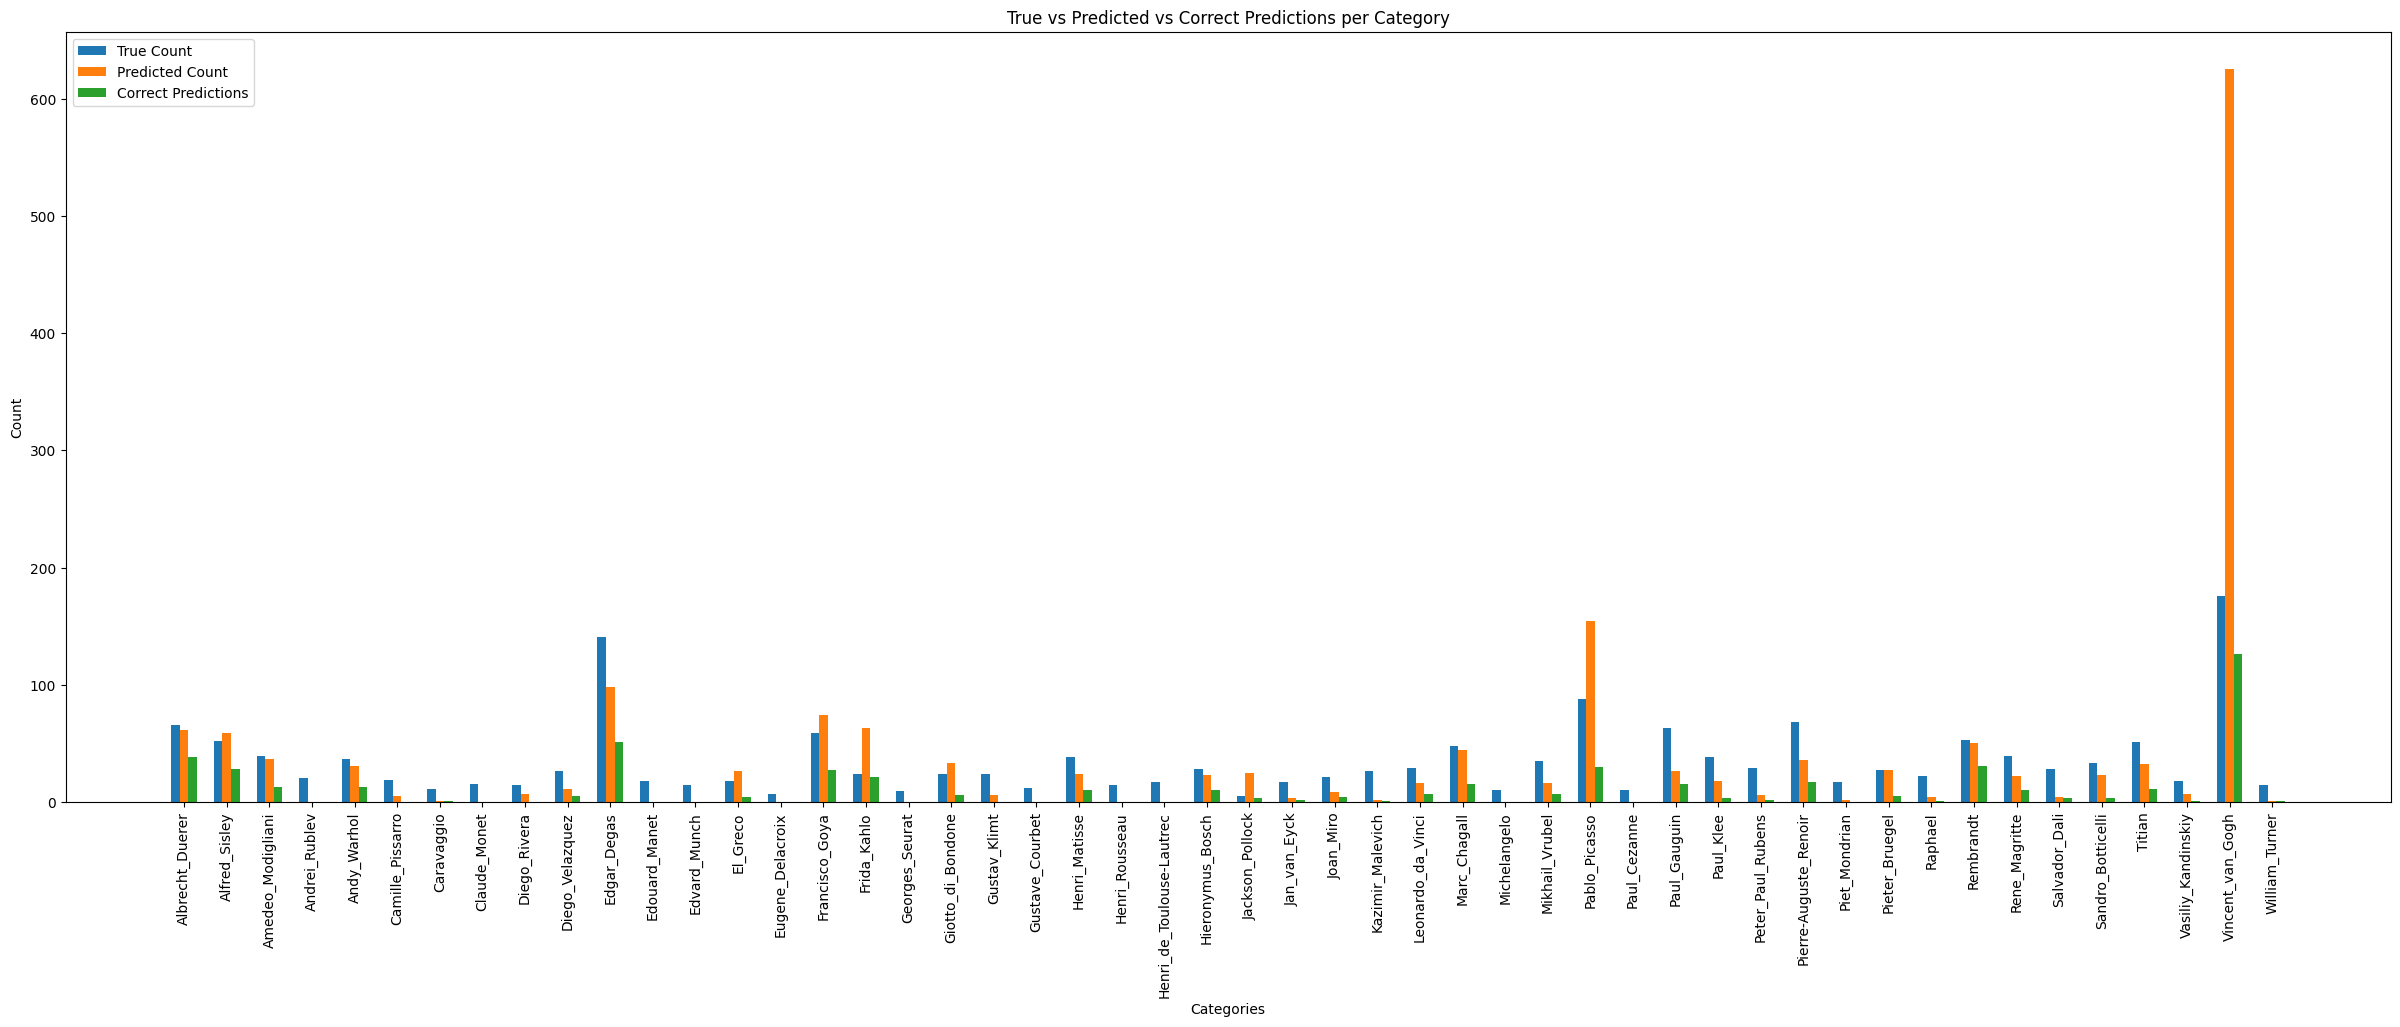

In [15]:
# Lade das Modell und führe Vorhersagen durch
results_v5 = calculateModelMetrics('./trained_models/my_model_v5.h5')
# Visualisierung der Ergebnisse
visualizeMetrics(results_v5)

54/54 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step
Total True Count: 1711
Total Correct Predictions: 773
Accuracy: 45.1783


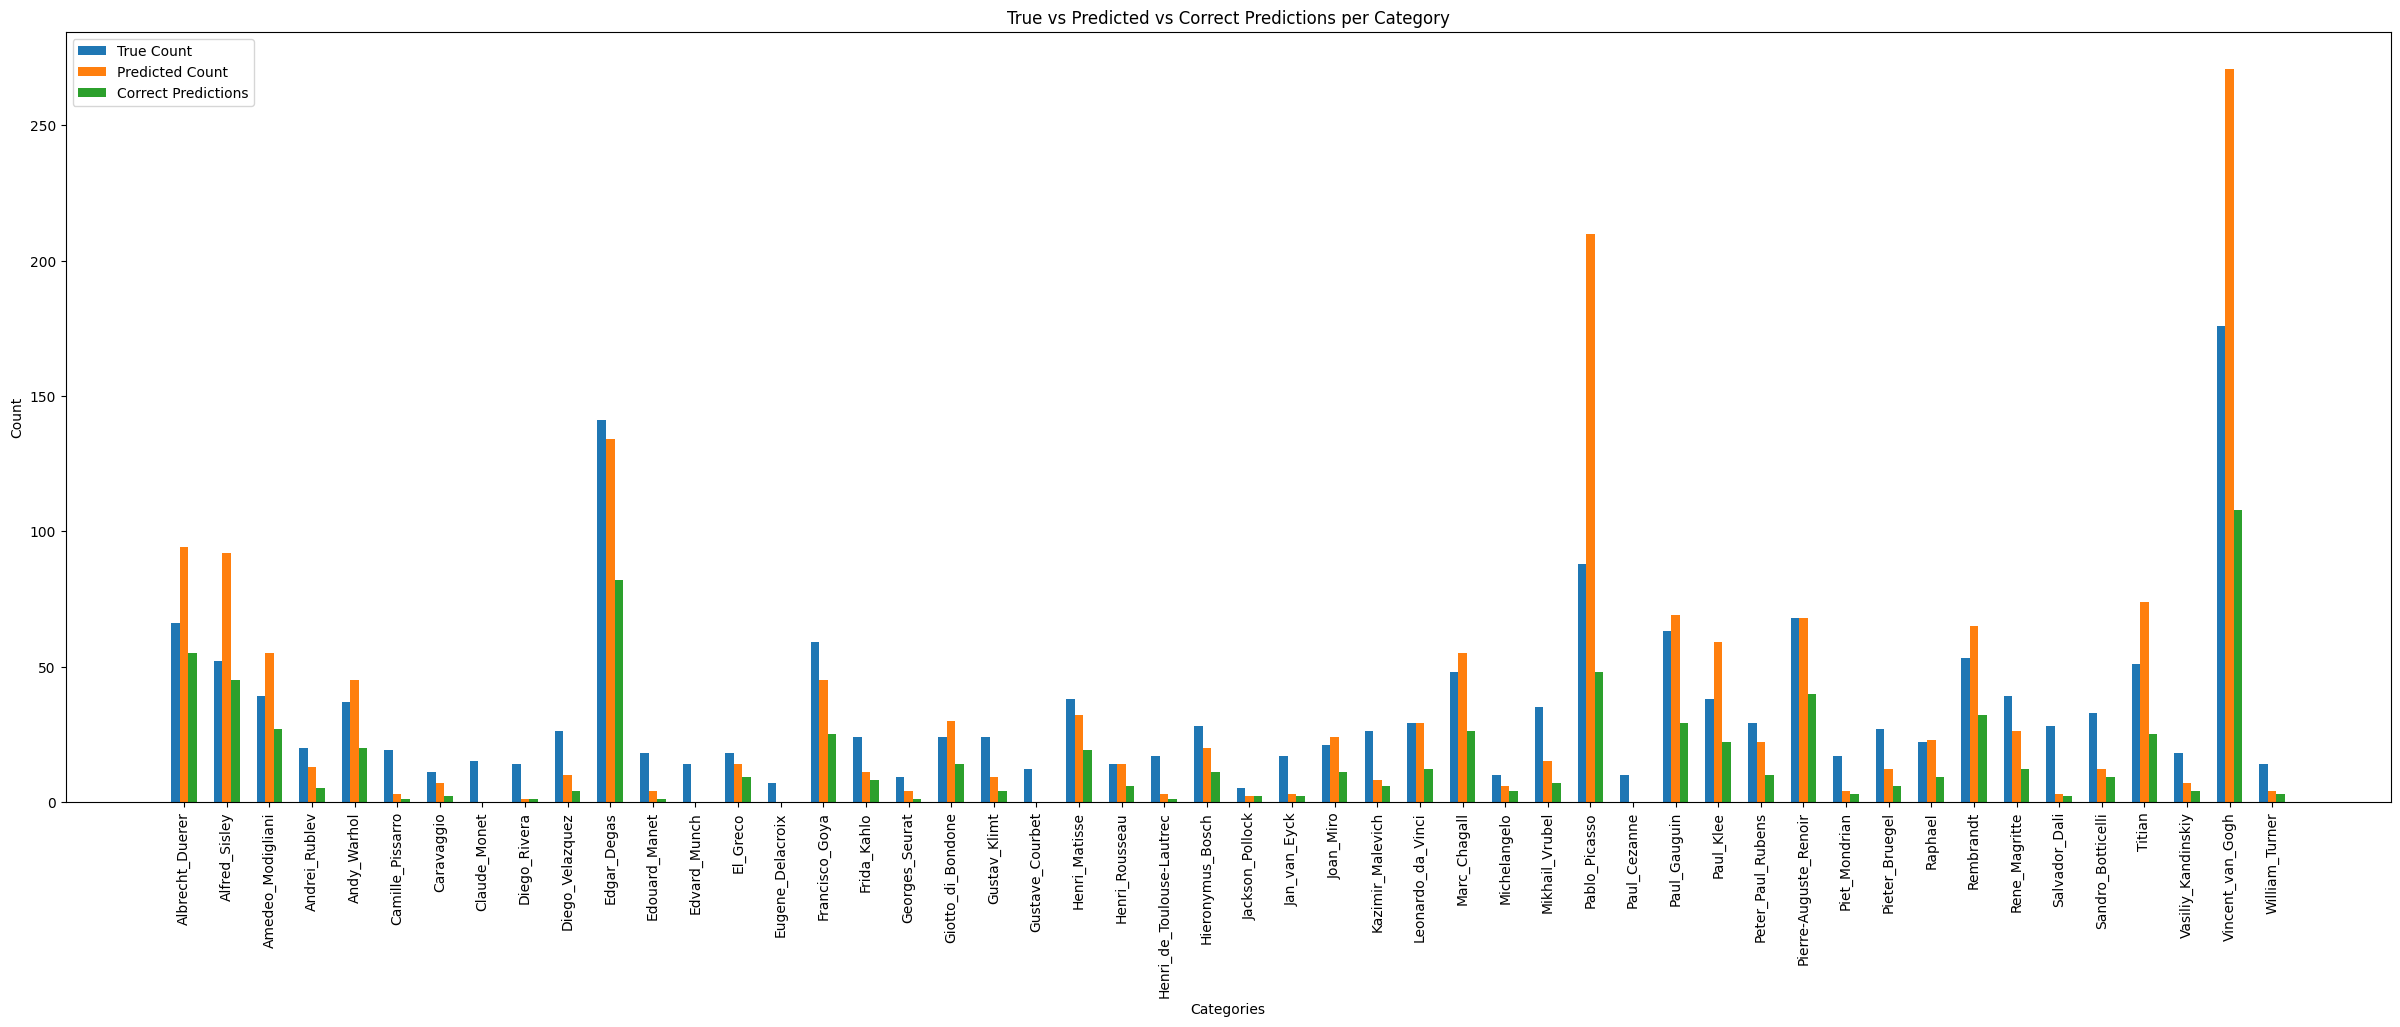

In [16]:
# Lade das Modell und führe Vorhersagen durch
results_v6 = calculateModelMetrics('./trained_models/my_model_v6.h5')
# Visualisierung der Ergebnisse
visualizeMetrics(results_v6)

In [ ]:
# Lade das Modell und führe Vorhersagen durch
results_v7 = calculateModelMetrics('./trained_models/my_model_v7.h5')
# Visualisierung der Ergebnisse
visualizeMetrics(results_v7)

In [ ]:
# Lade das Modell und führe Vorhersagen durch
results_v8 = calculateModelMetrics('./trained_models/my_model_v8.h5')
# Visualisierung der Ergebnisse
visualizeMetrics(results_v8)